### Early Stopping

Early stopping is a regularization technique `used during the training of machine learning models, particularly neural networks, to prevent overfitting`. \
It involves monitoring the model's performance on a validation dataset during training and stopping the training process when the performance on the validation set starts to degrade. \
This helps to ensure that the `model generalizes well to unseen data` rather than just memorizing the training data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,  LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
X = df.drop('species', axis=1).values
y = df['species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [7]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

c:\Users\Ali Baba\miniconda3\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.6961 - mae: 0.6964
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4467 - mae: 0.5123
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2800 - mae: 0.3968
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1648 - mae: 0.3063
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1187 - mae: 0.2542
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1135 - mae: 0.2330
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1097 - mae: 0.2269
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0928 - mae: 0.2155
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0725 - mae: 0.1914
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0652 - mae: 0.1833
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0602 - mae: 0.1784
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0560 - mae: 0.1701
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/ste

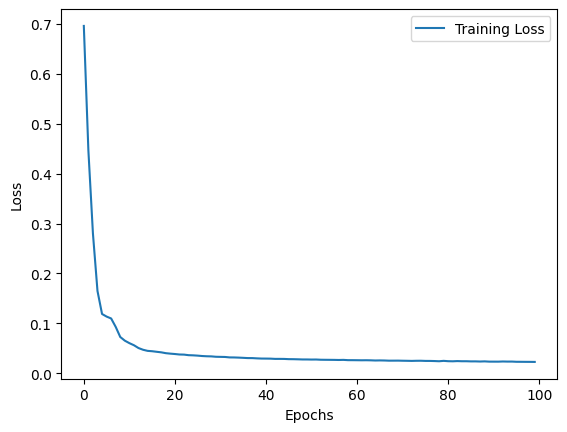

In [10]:
#plotting training history
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


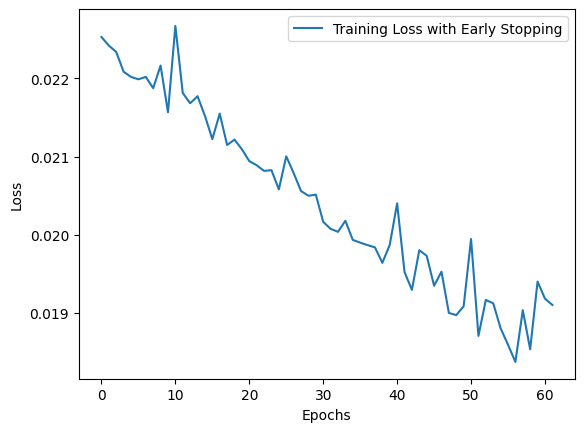

In [11]:
#use early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, callbacks=[early_stopping])
#plotting training history
plt.plot(history.history['loss'], label='Training Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()